In [1]:
from sqlalchemy import create_engine

# Replace with your actual credentials
username = 'root'
password = 'root'
host = 'localhost'
database = 'superstore_db'

# Create connection string
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')


In [14]:
import pandas as pd

query = """
SELECT
    Products.Category,
    SUM(OrderDetails.Sales) AS TotalSales,
    SUM(OrderDetails.Profit) AS TotalProfit,
    (SUM(OrderDetails.Profit) / SUM(OrderDetails.Sales)) * 100 AS ProfitMarginPercent
FROM OrderDetails
JOIN Products ON OrderDetails.ProductID = Products.ProductID
GROUP BY Products.Category
ORDER BY ProfitMarginPercent DESC;
"""

df = pd.read_sql(query, con=engine)
print(df)


          Category  TotalSales  TotalProfit  ProfitMarginPercent
0  Office Supplies   343424.94     66179.56            19.270458
1       Technology   228415.40     35385.88            15.491898
2        Furniture   247877.82     -2714.46            -1.095080


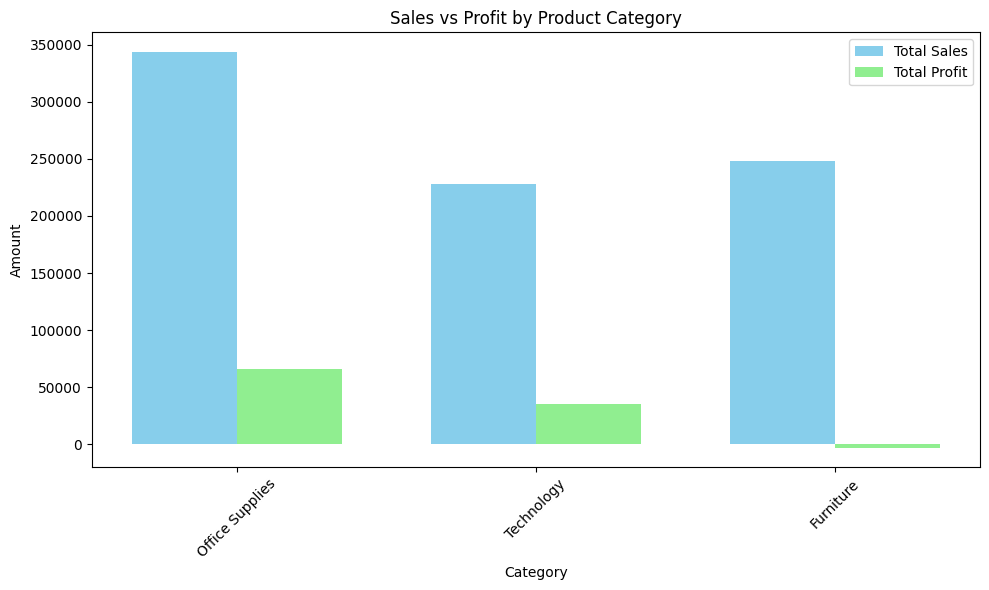

In [16]:
import numpy as np

x = np.arange(len(df['Category']))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, df['TotalSales'], width, label='Total Sales', color='skyblue')
plt.bar(x + width/2, df['TotalProfit'], width, label='Total Profit', color='lightgreen')

plt.xticks(x, df['Category'], rotation=45)
plt.title('Sales vs Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()


✅ Query successful! Here's a preview:
          Category RegionName  OrderYear  OrderMonth  TotalSales  TotalProfit  \
0        Furniture    Central       2025          10    58027.02     -1561.58   
1  Office Supplies    Central       2025          10    78667.46     12746.38   
2       Technology    Central       2025          10    56317.59      9159.03   
3        Furniture       East       2025          10    69205.09     -1958.22   
4  Office Supplies       East       2025          10   101378.21     19863.10   

   TotalQuantity  OrderDate  
0         1264.0 2025-10-01  
1         4956.0 2025-10-01  
2         1208.0 2025-10-01  
3         1506.0 2025-10-01  
4         6118.0 2025-10-01  


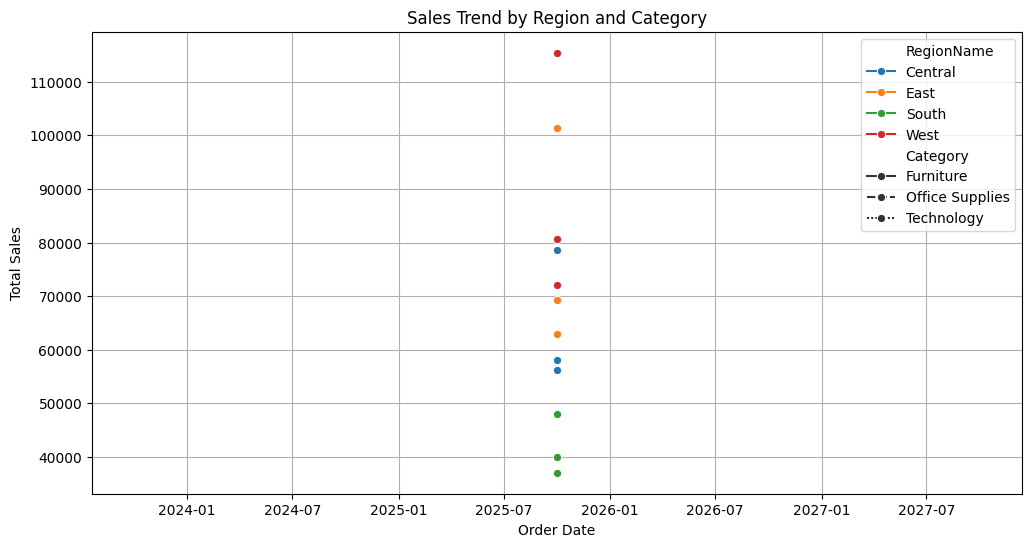

In [52]:
import pandas as pd
import plotly.express as px

# 1️⃣ Run your SQL query and get data
query = """
SELECT
    Products.Category,
    Regions.RegionName,
    YEAR(Orders.OrderDate) AS OrderYear,
    MONTH(Orders.OrderDate) AS OrderMonth,
    SUM(OrderDetails.Sales) AS TotalSales,
    SUM(OrderDetails.Profit) AS TotalProfit,
    SUM(OrderDetails.Quantity) AS TotalQuantity
FROM OrderDetails
JOIN Orders 
    ON OrderDetails.OrderID = Orders.OrderID
JOIN Products 
    ON OrderDetails.ProductID = Products.ProductID
JOIN Regions 
    ON Orders.RegionID = Regions.RegionID
GROUP BY 
    Products.Category, 
    Regions.RegionName, 
    YEAR(Orders.OrderDate), 
    MONTH(Orders.OrderDate)
ORDER BY 
    OrderYear, 
    OrderMonth, 
    Regions.RegionName, 
    Products.Category;
"""

# Replace `engine` with your existing SQLAlchemy engine
df = pd.read_sql(query, con=engine)

# 2️⃣ Prepare the data for visualization
df['OrderDate'] = pd.to_datetime(df['OrderYear'].astype(str) + '-' + df['OrderMonth'].astype(str) + '-01')
df = df.sort_values('OrderDate')

print("✅ Query successful! Here's a preview:")
print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='OrderDate', y='TotalSales', hue='RegionName', style='Category', marker='o')
plt.title('Sales Trend by Region and Category')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [53]:

import pandas as pd

query = """
SELECT
    Products.ProductName,
    Products.Category,
    SUM(OrderDetails.Sales) AS TotalSales,
    SUM(OrderDetails.Profit) AS TotalProfit
FROM OrderDetails
JOIN Products ON OrderDetails.ProductID = Products.ProductID
GROUP BY Products.ProductName, Products.Category
ORDER BY TotalSales DESC
LIMIT 10;
"""

# Replace `engine` with your existing SQLAlchemy engine
df = pd.read_sql(query, con=engine)

print("✅ Top 10 Products by Sales:")
print(df)


✅ Top 10 Products by Sales:
                                        ProductName         Category  \
0                        KI Adjustable-Height Table        Furniture   
1   Global Wood Trimmed Manager's Task Chair, Khaki        Furniture   
2        Situations Contoured Folding Chairs, 4/Set        Furniture   
3         Global High-Back Leather Tilter, Burgundy        Furniture   
4  Nortel Meridian M3904 Professional Digital phone       Technology   
5               Ibico Hi-Tech Manual Binding System  Office Supplies   
6                 Fellowes Officeware Wire Shelving  Office Supplies   
7                                 Easy-staple paper  Office Supplies   
8                  Logitech Gaming G510s - Keyboard       Technology   
9     Space Solutions HD Industrial Steel Shelving.  Office Supplies   

   TotalSales  TotalProfit  
0     4036.74      -361.99  
1     3621.01      -574.08  
2     2959.85       191.65  
3     2841.06      -333.30  
4     2802.62       615.95  
5    

C:\Users\csejn\AppData\Local\Temp\ipykernel_4416\1325368650.py:10: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.

C:\Users\csejn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.



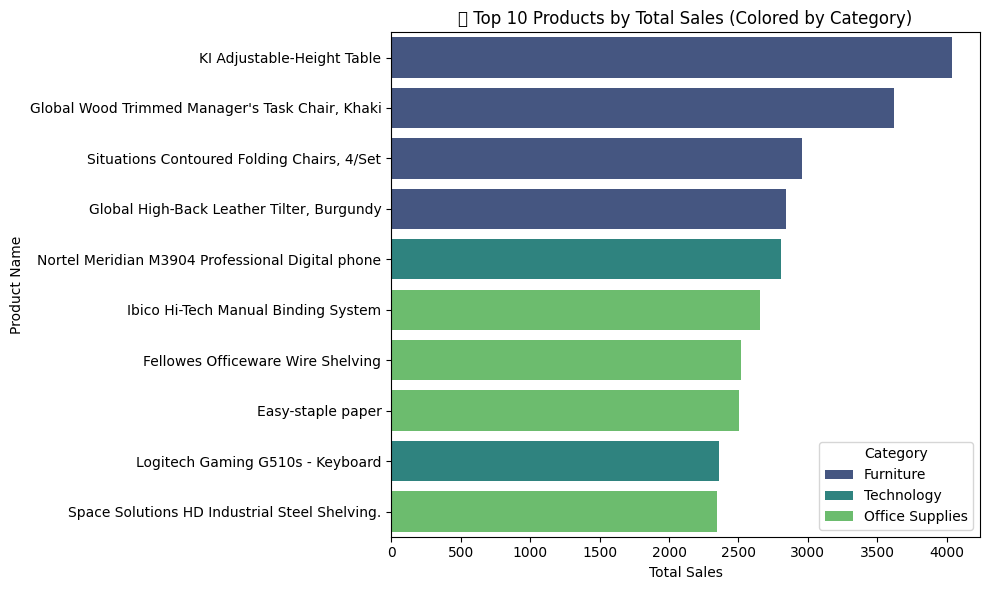

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='TotalSales', y='ProductName', hue='Category', palette='viridis')
plt.title('🏆 Top 10 Products by Total Sales (Colored by Category)')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd

query = """
SELECT
    YEAR(Orders.OrderDate) AS OrderYear,
    MONTH(Orders.OrderDate) AS OrderMonth,
    SUM(OrderDetails.Sales) AS TotalSales,
    SUM(OrderDetails.Profit) AS TotalProfit
FROM OrderDetails
JOIN Orders ON OrderDetails.OrderID = Orders.OrderID
GROUP BY YEAR(Orders.OrderDate), MONTH(Orders.OrderDate)
ORDER BY OrderYear, OrderMonth;
"""

# Replace `engine` with your SQLAlchemy connection
df = pd.read_sql(query, con=engine)

print("✅ Monthly Sales and Profit Data:")
print(df.head())


✅ Monthly Sales and Profit Data:
   OrderYear  OrderMonth  TotalSales  TotalProfit
0       2025          10   819718.16     98850.98


In [29]:
# Create a datetime column for easy plotting
df['OrderDate'] = pd.to_datetime(df['OrderYear'].astype(str) + '-' + df['OrderMonth'].astype(str) + '-01')

# Sort by date (just in case)
df = df.sort_values('OrderDate')

print(df.head())


   OrderYear  OrderMonth  TotalSales  TotalProfit  OrderDate
0       2025          10   819718.16     98850.98 2025-10-01


In [32]:
import plotly.express as px

fig = px.line(
    df,
    x='OrderDate',
    y=['TotalSales', 'TotalProfit'],
    markers=True,
    title='📊 Monthly Sales & Profit Over Time'
)

fig.update_layout(
    xaxis_title='Order Date',
    yaxis_title='Amount',
    legend_title='Metric',
    template='plotly_white',
    height=600
)

fig.show()


In [33]:
import pandas as pd

query = """
SELECT
    Regions.RegionName,
    YEAR(Orders.OrderDate) AS OrderYear,
    SUM(OrderDetails.Sales) AS TotalSales
FROM OrderDetails
JOIN Orders ON OrderDetails.OrderID = Orders.OrderID
JOIN Regions ON Orders.RegionID = Regions.RegionID
GROUP BY Regions.RegionName, YEAR(Orders.OrderDate)
ORDER BY Regions.RegionName, OrderYear;
"""

# Replace `engine` with your SQLAlchemy connection
df = pd.read_sql(query, con=engine)

print("✅ Yearly Sales by Region:")
print(df.head())


✅ Yearly Sales by Region:
  RegionName  OrderYear  TotalSales
0    Central       2025   193012.07
1       East       2025   233502.10
2      South       2025   124998.58
3       West       2025   268205.41


In [34]:
df['OrderYear'] = df['OrderYear'].astype(int)
df = df.sort_values(['OrderYear', 'RegionName'])


In [38]:
fig = px.bar(
    df,
    x='OrderYear',
    y='TotalSales',
    color='RegionName',
    barmode='group',
    text='TotalSales',
    title='🏆 Yearly Sales by Region (Grouped Bar)'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Sales',
    template='plotly_white',
    height=600
)
fig.show()


In [39]:
import pandas as pd

query = """
SELECT
    Regions.RegionName,
    SUM(OrderDetails.Sales) AS TotalSales,
    SUM(OrderDetails.Profit) AS TotalProfit
FROM OrderDetails
JOIN Orders ON OrderDetails.OrderID = Orders.OrderID
JOIN Regions ON Orders.RegionID = Regions.RegionID
GROUP BY Regions.RegionName
ORDER BY TotalSales DESC
LIMIT 5;
"""

# Run SQL query
df = pd.read_sql(query, con=engine)

print("✅ Top 5 Regions by Total Sales:")
print(df)


✅ Top 5 Regions by Total Sales:
  RegionName  TotalSales  TotalProfit
0       West   268205.41     33939.89
1       East   233502.10     26864.82
2    Central   193012.07     20343.83
3      South   124998.58     17702.44


In [40]:
df['ProfitMarginPercent'] = (df['TotalProfit'] / df['TotalSales']) * 100


In [44]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['RegionName'],
    y=df['TotalSales'],
    name='Total Sales',
    marker_color='lightskyblue'
))

fig.add_trace(go.Bar(
    x=df['RegionName'],
    y=df['TotalProfit'],
    name='Total Profit',
    marker_color='mediumseagreen'
))

fig.add_trace(go.Scatter(
    x=df['RegionName'],
    y=df['ProfitMarginPercent'],
    name='Profit Margin %',
    mode='lines+markers',
    yaxis='y2',
    line=dict(color='darkorange', width=3)
))

fig.update_layout(
    title='🏆 Top 5 Regions: Sales, Profit & Margin',
    xaxis=dict(title='Region'),
    yaxis=dict(title='Amount'),
    yaxis2=dict(title='Profit Margin (%)', overlaying='y', side='right'),
    barmode='group',
    template='plotly_white',
    height=550
)

fig.show()


In [45]:
import pandas as pd

query = """
SELECT
    Customers.CustomerName,
    SUM(OrderDetails.Sales) AS TotalSales,
    SUM(OrderDetails.Profit) AS TotalProfit
FROM OrderDetails
JOIN Orders ON OrderDetails.OrderID = Orders.OrderID
JOIN Customers ON Orders.CustomerID = Customers.CustomerID
GROUP BY Customers.CustomerName
ORDER BY TotalSales DESC
LIMIT 10;
"""

# Run the query
df = pd.read_sql(query, con=engine)

print("✅ Top 10 Customers by Total Sales:")
print(df)


✅ Top 10 Customers by Total Sales:
      CustomerName  TotalSales  TotalProfit
0       Paul Prost     4196.93       897.89
1  Laura Armstrong     3751.81      1074.21
2     Ken Lonsdale     3371.69       165.49
3         John Lee     3338.36       785.24
4    William Brown     3131.97       298.36
5     Noel Staavos     2964.82      -234.76
6      Rick Wilson     2879.89       368.32
7    Sally Hughsby     2865.62       553.04
8     Edward Hooks     2821.20       782.40
9    Arthur Gainer     2806.84       -12.32


In [46]:
df['ProfitMarginPercent'] = (df['TotalProfit'] / df['TotalSales']) * 100


In [49]:
import plotly.express as px

fig = px.bar(
    df,
    x='TotalSales',
    y='CustomerName',
    orientation='h',
    text='TotalSales',
    color='TotalSales',
    color_continuous_scale='Blues',
    title='🏆 Top 10 Customers by Total Sales'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Total Sales',
    yaxis_title='Customer',
    template='plotly_white',
    height=600
)

fig.show()


